In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *

predictor = 5000
np.random.seed(41)
x = []
for n in range(predictor):
    x.append(np.random.normal(0, 0.1, 50).tolist())
x = np.array(x)
x = np.transpose(x)
y = np.hstack((np.ones(25),np.zeros(25)))
random.shuffle(y)
df = pd.DataFrame(x)
df['output'] = y

In [42]:
#get highest correlated predictors
correl = df.corr()['output'][0:predictor].abs().sort_values(ascending = False)
nbr = KNeighborsClassifier(n_neighbors = 1)

In [43]:
nbr.fit(x[:25],y[:25])
raw_score = nbr.score(x[25:50],y[25:50])
print('raw classifier test: {}'.format(raw_score))

raw classifier test: 0.36


In [44]:
correl_wrong = correl.index[:100]
x_wrong = df[correl_wrong].values

In [87]:
kf = KFold(n_splits=5)
score = []
for train_index, test_index in kf.split(x_wrong):
    nbr.fit(x_wrong[train_index],y[train_index])
    score.append(nbr.score(x_wrong[test_index],y[test_index]))
AvgA = sum(score)/len(score)
print('AvgAccuracy: {}'.format(AvgA))

AvgAccuracy: 1.0


(array([ 4., 13., 27.,  6.,  9., 16., 14., 11.]),
 array([-0.85393732, -0.64282883, -0.43172034, -0.22061185, -0.00950335,
         0.20160514,  0.41271363,  0.62382212,  0.83493061]),
 <BarContainer object of 8 artists>)

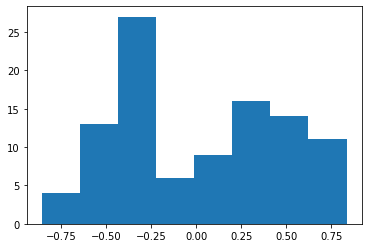

In [46]:
training_output = df['output']
lr = LogisticRegression()
mse_estimate = -1 * cross_val_score(lr,x_wrong,y,cv=10,scoring='neg_mean_squared_error')
pd.DataFrame(mse_estimate).mean()
df_samples = df.sample(n=10)
corr_g = df_samples.corr()['output'][df.corr()['output'] < 1]
plt.hist(corr_g[correl_wrong], bins='auto')
#the graph does not accurately reflect the normal distribution of the input

In [90]:
#right:
score_right = []
for train_index, test_index in kf.split(x):
    train_df = df.loc[train_index,:]
    test_df = df.loc[test_index,:]
    corr_right = train_df.corr()['output'][0:predictor].abs().sort_values(ascending = False)
    corr_index = corr_right.index[0:100]
    nbr.fit(train_df[corr_index],train_df['output'])
    score_right.append(nbr.score(test_df[corr_index],test_df['output']))

In [104]:
Avg_right = sum(score_right)/len(score_right)
print('righr accuracy: {}'.format(Avg_right))

righr accuracy: 0.4


In [103]:
df['output']=df['output'].astype(int)
kf = StratifiedKFold (n_splits=10)
mse = []
fold_count = 0
for train, test in kf.split(x,y):
    train_fold = df.iloc[train]
    test_fold = df.iloc[test]
    temp = train_fold.corr()['output'][0:predictor]
    corr = temp.abs().sort_values(ascending=False)
    features = corr.index[[range(100)]].values
    
    train_input  = train_fold[features].values
    train_output = train_fold['output']
    
    lr = LogisticRegression()
    lr.fit(train_input, train_output)
    
    pred = lr.predict(test_fold[features])
    mse.append(mean_squared_error(test_fold.output, pred))
    
    fold_count += 1

(array([ 2.,  9., 10., 17., 22., 19., 15.,  6.]),
 array([-0.42424094, -0.33170298, -0.23916502, -0.14662707, -0.05408911,
         0.03844885,  0.13098681,  0.22352477,  0.31606273]),
 <BarContainer object of 8 artists>)

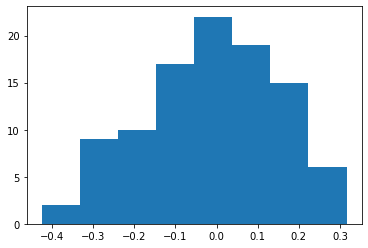

In [105]:
pd.DataFrame(mse).mean()
index = np.random.randint(0,predictor,size=100)
plt.hist(temp[index], bins='auto')
# the graph matches the ones provided in textbook